# **Predicting Network Connectivity in Traffic Networks: A Comparative Analysis of Link Prediction Algorithms Using Sumo Simulation**

In [1]:
pip install torch_geometric

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\shubh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install -U node2vec

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\shubh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


###The code below reads data from a CSV file which is obtained from SUMO simulation using TraCI library and creates a graph using the NetworkX library. Each node has several attributes, such as position, speed, and lane. After adding the nodes, the code connects nodes that are within a certain distance of each other, creating edges between them. The resulting graph is then visualized using the Matplotlib library.

In [3]:

import pandas as pd
import networkx as nx

# Load data into a Pandas DataFrame.
data = pd.read_csv('output.csv')

G = nx.Graph()
ss= []
# Add nodes to graph.
for i, row in data.iterrows():
    G.add_node(int(row['VID'][3::]), pos=(int(row['Position(X)']), int(row['Position(Y)'])), speed=(int(row['Speed']),int(row['max']),int(row['allowed'])), lane=row['LID'])

# Connect nodes that are within a short distance of each other.
for u, u_data in G.nodes(data=True):
    print(u)
    print(u_data)
    for v, v_data in G.nodes(data=True):
        if u == v:
            continue
        dist = ((u_data['pos'][0]-v_data['pos'][0])**2 + (u_data['pos'][1]-v_data['pos'][1])**2)**0.5
        if dist < 1000:  
            G.add_edge(u, v)
new_G = G
print(G.nodes())
print(G.edges())

# Visualize the graph.
import matplotlib.pyplot as plt

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, with_labels=True)
plt.show()

ValueError: cannot convert float NaN to integer

### A Node2Vec model is trained on the training set, and its link prediction performance is evaluated on the testing set. The similarity score is computed using the Word2Vec model from the Gensim package. Finally, the accuracy of the link prediction is printed.

In [ ]:
import networkx as nx
import numpy as np
import random
from gensim.models import Word2Vec

# Split the graph into train and test sets.
train_G = G.copy()
test_G = nx.Graph()
for (u, v) in list(G.edges()):
    if random.random() < 0.2:  # Remove 20% of the edges.
        train_G.remove_edge(u, v)
        test_G.add_edge(u, v)

# Train a link prediction model on the train set.
from node2vec import Node2Vec
node2vec = Node2Vec(train_G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit()

# Predict the missing edges using the trained model.
missing_edges = list(nx.non_edges(G))
predictions = []
for (u, v) in missing_edges:
    if model.wv.similarity(str(u), str(v)) > 0.5:  # Predict a link if similarity score is above threshold.
        predictions.append((u, v))

# Create a new graph by adding all the edges from G and the predicted edges
G_pred = nx.Graph()
G_pred.add_edges_from(G.edges())
G_pred.add_edges_from(predictions)

# Evaluate the model on the test set.
def evaluate_model(model, test_G):
    y_true = []
    y_pred = []
    for (u, v) in test_G.edges():
        y_true.append(1)
        if model.wv.similarity(str(u), str(v)) > 0.5:  # Predict a link if similarity score is above threshold.
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_true, y_pred

y_true, y_pred = evaluate_model(model, test_G)
accuracy = np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
print("Accuracy:", accuracy)


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]

Accuracy: 0.9719626168224299


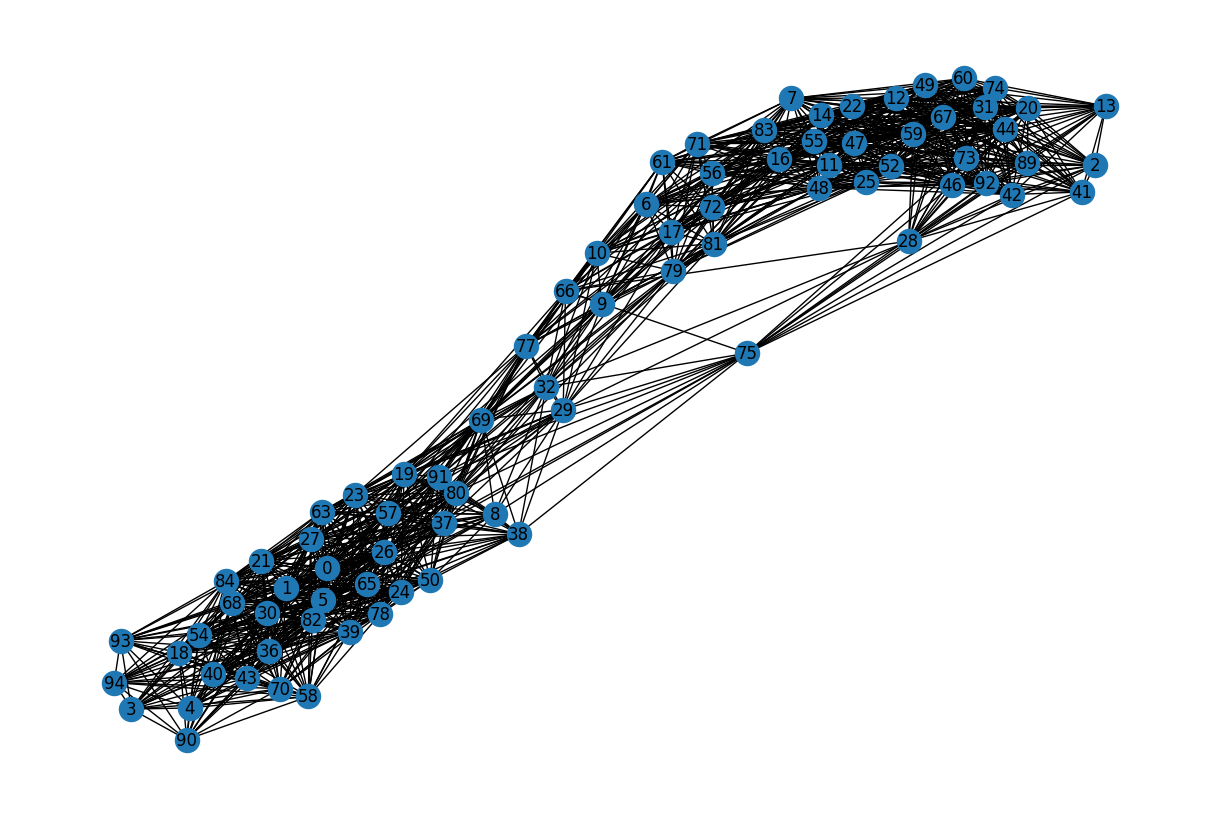

In [ ]:
plt.figure(figsize=(12, 8))              #Plot the combined graph after prediction
nx.draw(G_pred, with_labels = True)

#The common neighbor approach 

#####First, we removes 20% of the edges in the graph G. Then, it generates a list of missing edges, which are all possible edges that are not present in the current graph G. Next, for each missing edge, it calculates the number of common neighbors that the two nodes connected by the edge have in the current graph G, and predicts that the edge exists if the number of common neighbors is greater than zero. Finally, it compares the predicted labels with the actual labels.

<ipython-input-60-b16b25559580>:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = sample(G.edges(), int(0.2 * G.number_of_edges()))


[((0, 1), 1), ((0, 2), 0), ((0, 3), 0), ((0, 4), 1), ((0, 5), 3), ((0, 6), 0), ((0, 7), 0), ((0, 9), 1), ((0, 10), 1), ((0, 11), 0), ((0, 12), 0), ((0, 13), 0), ((0, 14), 0), ((0, 16), 0), ((0, 17), 1), ((0, 18), 0), ((0, 20), 0), ((0, 21), 2), ((0, 22), 0), ((0, 23), 7), ((0, 24), 2), ((0, 25), 0), ((0, 28), 0), ((0, 29), 5), ((0, 30), 2), ((0, 31), 0), ((0, 32), 5), ((0, 36), 1), ((0, 39), 0), ((0, 40), 1), ((0, 41), 0), ((0, 42), 0), ((0, 43), 1), ((0, 44), 0), ((0, 46), 0), ((0, 47), 0), ((0, 48), 0), ((0, 49), 0), ((0, 50), 3), ((0, 52), 0), ((0, 54), 1), ((0, 55), 0), ((0, 56), 0), ((0, 58), 1), ((0, 59), 0), ((0, 60), 0), ((0, 61), 0), ((0, 65), 2), ((0, 66), 1), ((0, 67), 0), ((0, 68), 1), ((0, 70), 1), ((0, 71), 0), ((0, 72), 0), ((0, 73), 0), ((0, 74), 0), ((0, 75), 2), ((0, 77), 2), ((0, 78), 0), ((0, 79), 1), ((0, 81), 0), ((0, 83), 0), ((0, 84), 0), ((0, 89), 0), ((0, 90), 0), ((0, 92), 0), ((0, 93), 1), ((0, 94), 0), ((1, 2), 0), ((1, 3), 0), ((1, 4), 0), ((1, 6), 0), ((1

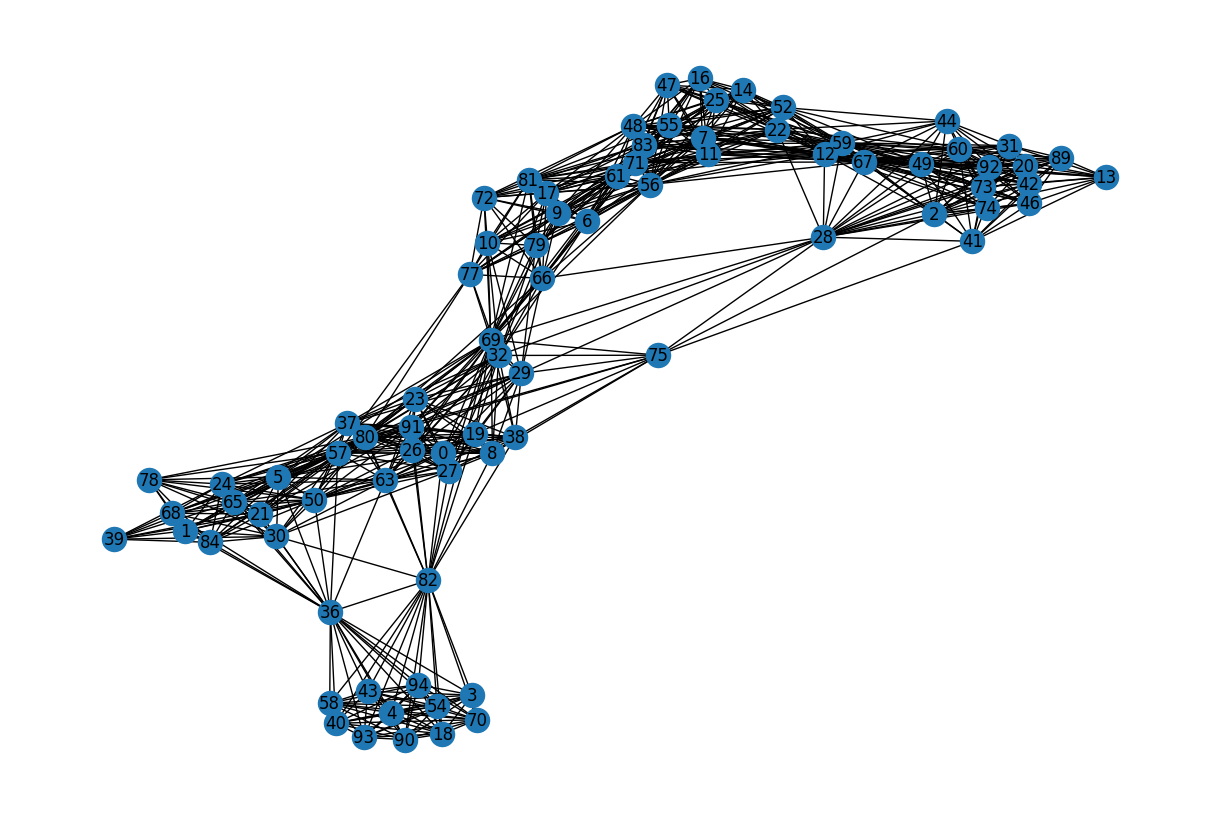

In [ ]:
import networkx as nx
from random import sample
from sklearn.metrics import accuracy_score, precision_score, recall_score
G = new_G

# Remove some edges at random
edges_to_remove = sample(G.edges(), int(0.2 * G.number_of_edges()))
G.remove_edges_from(edges_to_remove)

missing_edges = list(nx.non_edges(G))

# Predict the missing edges using the common neighbor approach
predictions = []
for edge in missing_edges:
    cn = len(list(nx.common_neighbors(G, *edge)))
    predictions.append((edge, cn))
print(predictions)

# Evaluate the result
actual_labels = [1 if G.has_edge(*edge) else 0 for edge in missing_edges]
predicted_labels = [1 if p[1] > 0 else 0 for p in predictions]
accuracy = accuracy_score(actual_labels, predicted_labels)

# Create a new graph by adding all the edges from G and the predicted edges
G_pred = nx.Graph()
G_pred.add_edges_from(G.edges())
G_pred.add_edges_from([p[0] for p in predictions if p[1] > 2])


plt.figure(figsize=(12, 8))        # Plot the combined graph after prediction
nx.draw(G_pred, with_labels = True)

print("Accuracy:", accuracy)




In [ ]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Jaccard coefficient

### Sj(i,j)=|N(i) ∩ N(j)||N(i) ∪ N(j)|

where, Sj(i,j) is the Jaccard coefficient for vertices i and j.


####Link prediction using Jaccard similarity is a common technique in network analysis to predict missing edges in a graph. The idea is to use the Jaccard similarity coefficient to measure the similarity between the sets of neighbors of two nodes, and then use this similarity score to predict whether an edge should exist between these two nodes.

##### The process involves the following steps:

##### * Compute the Jaccard similarity coefficient between each pair of nodes in the graph based on the sets of their neighbors.

##### * Choose a threshold value for the Jaccard similarity coefficient above which a link is predicted to exist between the two nodes.

##### * Use the predicted links to construct a new graph that includes the original graph as well as the predicted links.

In [ ]:
proportion_edges = 0.20
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# remove some edges and repredict these edges, and measure how close the prediction is to the original.
G= new_G
G_train = G.copy()
G_train.remove_edges_from(edge_subset)

<ipython-input-62-de2b5aa4081a>:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))


In [ ]:
edge_subset_size = len(list(edge_subset))
print("Deleted edges =", str(edge_subset_size))
print("Remaining edges =", str(G.number_of_edges() - edge_subset_size))

print(edge_subset)

Deleted edges = 84
Remaining edges = 340
[(26, 57), (26, 91), (18, 93), (6, 9), (57, 77), (19, 37), (48, 83), (55, 83), (7, 22), (36, 70), (10, 69), (17, 77), (57, 80), (30, 63), (22, 25), (46, 92), (7, 61), (32, 91), (48, 55), (44, 59), (14, 71), (36, 54), (46, 67), (8, 38), (19, 27), (17, 79), (24, 78), (9, 77), (8, 19), (47, 55), (52, 71), (58, 94), (42, 73), (21, 68), (29, 80), (24, 39), (28, 66), (50, 68), (4, 70), (5, 57), (56, 83), (0, 63), (20, 44), (12, 49), (0, 38), (2, 46), (48, 52), (72, 83), (43, 93), (32, 66), (68, 78), (56, 71), (49, 74), (4, 43), (56, 81), (26, 37), (13, 89), (25, 55), (67, 74), (14, 83), (12, 22), (10, 61), (38, 91), (48, 71), (49, 59), (12, 67), (7, 14), (70, 94), (72, 81), (50, 78), (7, 12), (31, 60), (5, 68), (47, 83), (3, 90), (13, 73), (2, 73), (49, 92), (38, 69), (8, 26), (16, 47), (36, 58), (54, 82), (25, 71)]


In [ ]:
# calculating jaccard coefficient for all the node pairs in G_train.

prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [ ]:
fpr_jaccard, tpr_jaccard, thresholds_jaccard = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)   # calculating fpr, tpr, and auc values for various thresholds of the jaccard coefficient.

In [ ]:
# Calculate the Jaccard coefficient for all the node pairs in G_train.
prediction_jaccard = list(nx.jaccard_coefficient(G_train))
print(prediction_jaccard)
threshold = 0.5
predicted_edges_jaccard = [(u, v) for (u, v, s) in prediction_jaccard if s > threshold]

# Create a new graph by adding all the edges from G_train and the predicted edges
G_pred_train = nx.Graph()
G_pred_train.add_edges_from(G_train.edges())
G_pred_train.add_edges_from(predicted_edges_jaccard)

[(0, 1, 0.05263157894736842), (0, 2, 0.0), (0, 3, 0.0), (0, 4, 0.07692307692307693), (0, 5, 0.05263157894736842), (0, 6, 0.0), (0, 7, 0.0), (0, 9, 0.058823529411764705), (0, 10, 0.0), (0, 11, 0.0), (0, 12, 0.0), (0, 13, 0.0), (0, 14, 0.0), (0, 16, 0.0), (0, 17, 0.06666666666666667), (0, 18, 0.0), (0, 20, 0.0), (0, 21, 0.1111111111111111), (0, 22, 0.0), (0, 23, 0.4166666666666667), (0, 24, 0.11764705882352941), (0, 25, 0.0), (0, 28, 0.0), (0, 29, 0.2857142857142857), (0, 30, 0.05), (0, 31, 0.0), (0, 32, 0.1875), (0, 36, 0.058823529411764705), (0, 38, 0.35714285714285715), (0, 39, 0.0), (0, 40, 0.058823529411764705), (0, 41, 0.0), (0, 42, 0.0), (0, 43, 0.058823529411764705), (0, 44, 0.0), (0, 46, 0.0), (0, 47, 0.0), (0, 48, 0.0), (0, 49, 0.0), (0, 50, 0.1875), (0, 52, 0.0), (0, 54, 0.0), (0, 55, 0.0), (0, 56, 0.0), (0, 58, 0.058823529411764705), (0, 59, 0.0), (0, 60, 0.0), (0, 61, 0.0), (0, 63, 0.38461538461538464), (0, 65, 0.11764705882352941), (0, 66, 0.058823529411764705), (0, 67, 0.0

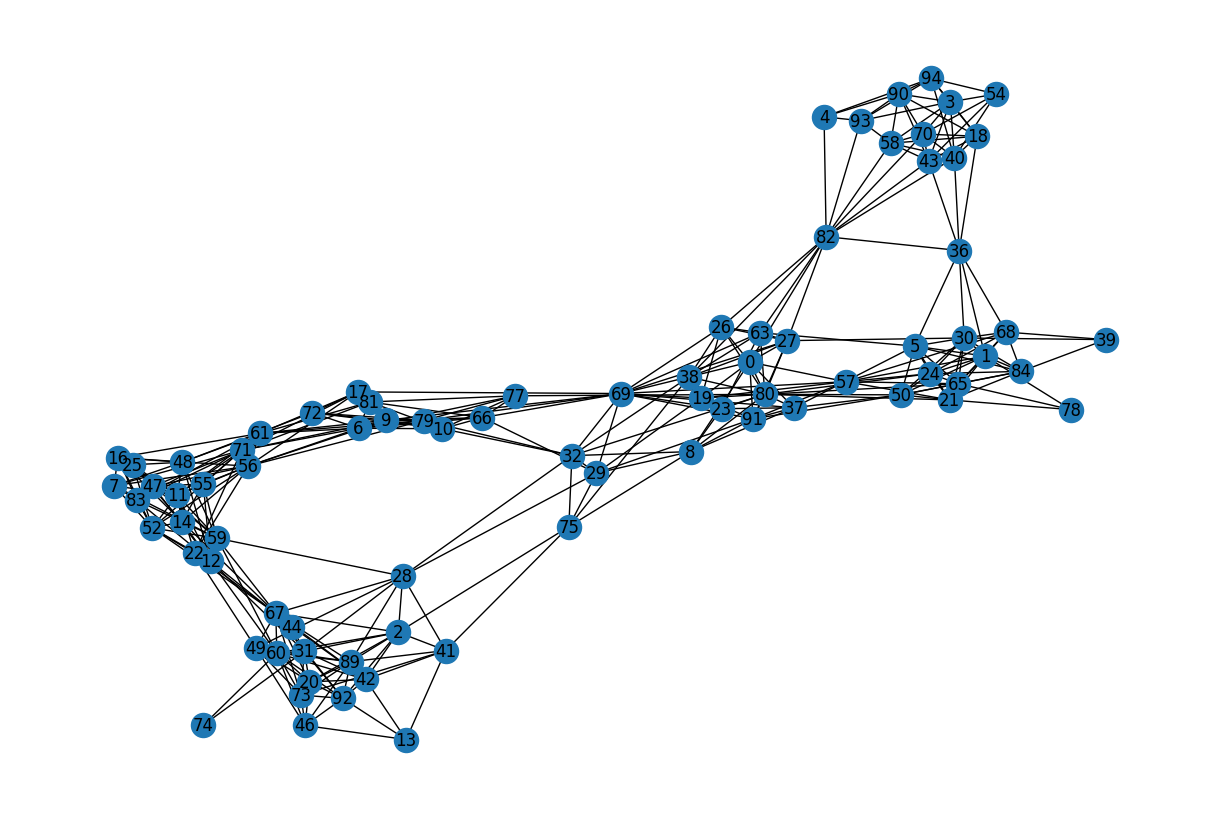

In [ ]:
plt.figure(figsize=(12, 8))      # Plot the combined graph after prediction
nx.draw(G_pred_train, with_labels = True)

##### This code calculates the Jaccard coefficient for all pairs of nodes in a graph represented by G_train. The Jaccard coefficient measures the similarity between sets, and in this case, it is used to measure the similarity of the sets of neighbors of two nodes in the graph.

##### After computing the Jaccard coefficient for all node pairs, the code performs binary classification by taking various thresholds for the Jaccard coefficient. The score_jaccard and label_jaccard variables are used to store the Jaccard coefficients and the ground truth labels (i.e., whether an edge is present or not) for each pair of nodes.

##### The roc_curve and roc_auc_score functions from the sklearn.metrics library are then used to compute the receiver operating characteristic (ROC) curve and area under the curve (AUC) for the binary classifier.

##### Finally, the code uses a threshold of 0.5 to predict edges based on the Jaccard coefficient, creates a new graph G_pred_train by adding the predicted edges to G_train, and returns G_pred_train. Finally plotting the graph.

# **Adamic-Adar similarity**

Sa(i,j)=∑k ∈ N(i) ∩ N(j)1log|N(k)| 

Where  Sa(i,j)  is the Adamic-Adar similarity measure for vertices  i  and  j .

Link prediction using Adamic-Adar similarity is a technique to predict the likelihood of the existence of an edge between two nodes in a network based on their similarity using the Adamic-Adar measure.

The Adamic-Adar measure is a similarity metric that is based on the idea that the similarity between two nodes in a network can be estimated by considering the common neighbors they share. It assigns higher weights to common neighbors that are less frequent in the network. 

In [ ]:
#  computes the Adamic-Adar index for all pairs of nodes in a graph and extracts the scores and labels for use in evaluating a link prediction

prediction_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [ ]:
#calculate the false positive rate (fpr), true positive rate (tpr), and area under the curve (auc) values using the Adamic-Adar measure,
fpr_adamic, tpr_adamic, thresholds_adamic = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)   

In [ ]:
# Calculate the Adamic-Adar index for all the node pairs in G_train.
prediction_adamic = list(nx.adamic_adar_index(G_train))
threshold = 0.5
predicted_edges_adamic = [(u, v) for (u, v, s) in prediction_adamic if s > threshold]

# Create a new graph by adding all the edges from G_train and the predicted edges
G_pred_train = nx.Graph()
G_pred_train.add_edges_from(G_train.edges())
G_pred_train.add_edges_from(predicted_edges_adamic)


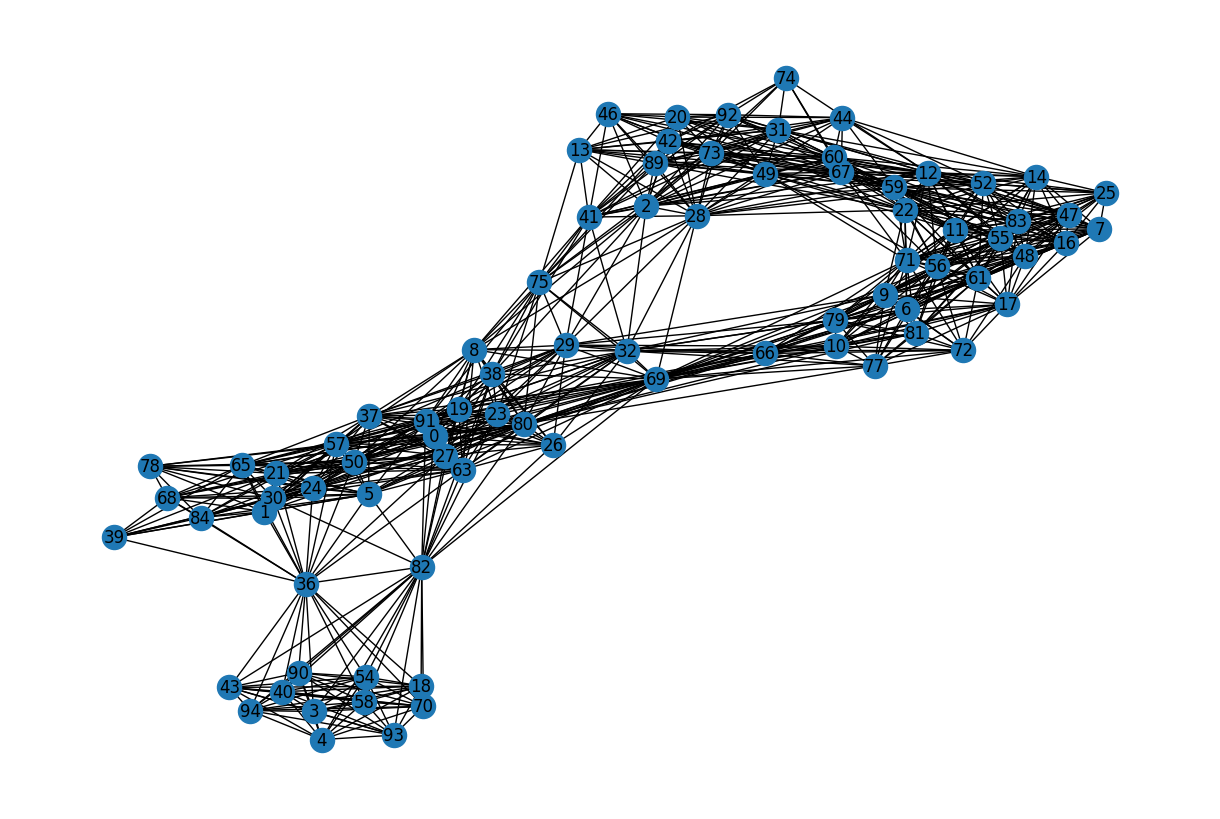

In [ ]:
plt.figure(figsize=(12, 8))     # Plot the combined graph after prediction
nx.draw(G_pred_train, with_labels = True)

# Preferential attachment measure

Sp(i,j)=|N(i)| ⋅ |N(j)| 

Where,  Sp(i,j)  is the preferential attachment measure between vertices  i  and  j  according the the Barabási-Albert model of preferential attachment.

Preferential attachment is a measure used in link prediction to estimate the likelihood of a new link forming between two nodes in a network based on their degree (i.e., number of edges). The basic idea behind preferential attachment is that nodes with higher degrees are more likely to form new connections than nodes with lower degrees, as they have more connections to other nodes and are therefore more visible in the network.

The preferential attachment measure can be implemented as follows:

Compute the degree of each node in the network.
For each pair of nodes (i,j) that are not currently connected:

a. Calculate the product of their degrees, k_i and k_j.

b. Normalize this product by the sum of the degrees of all nodes in the network.

c. Use the resulting value as an estimate of the likelihood of a link forming between nodes i and j.

In [ ]:
#  computes the preferential attachment measure for all pairs of nodes in a graph and extracts the scores and labels for use in evaluating link prediction

prediction_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

In [ ]:
# calculate the false positive rate (fpr), true positive rate (tpr), and area under the curve (auc) values 
fpr_pref, tpr_pref, thresholds_pref = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

In [ ]:
# Calculate the preferential attachment score for all the node pairs in G_train.
prediction_pref = list(nx.preferential_attachment(G_train))

threshold = 150
predicted_edges_pref = [(u, v) for (u, v, s) in prediction_pref if s > threshold]

# Create a new graph by adding all the edges from G_train and the predicted edges
G_pred_train = nx.Graph()
G_pred_train.add_edges_from(G_train.edges())
G_pred_train.add_edges_from(predicted_edges_pref)


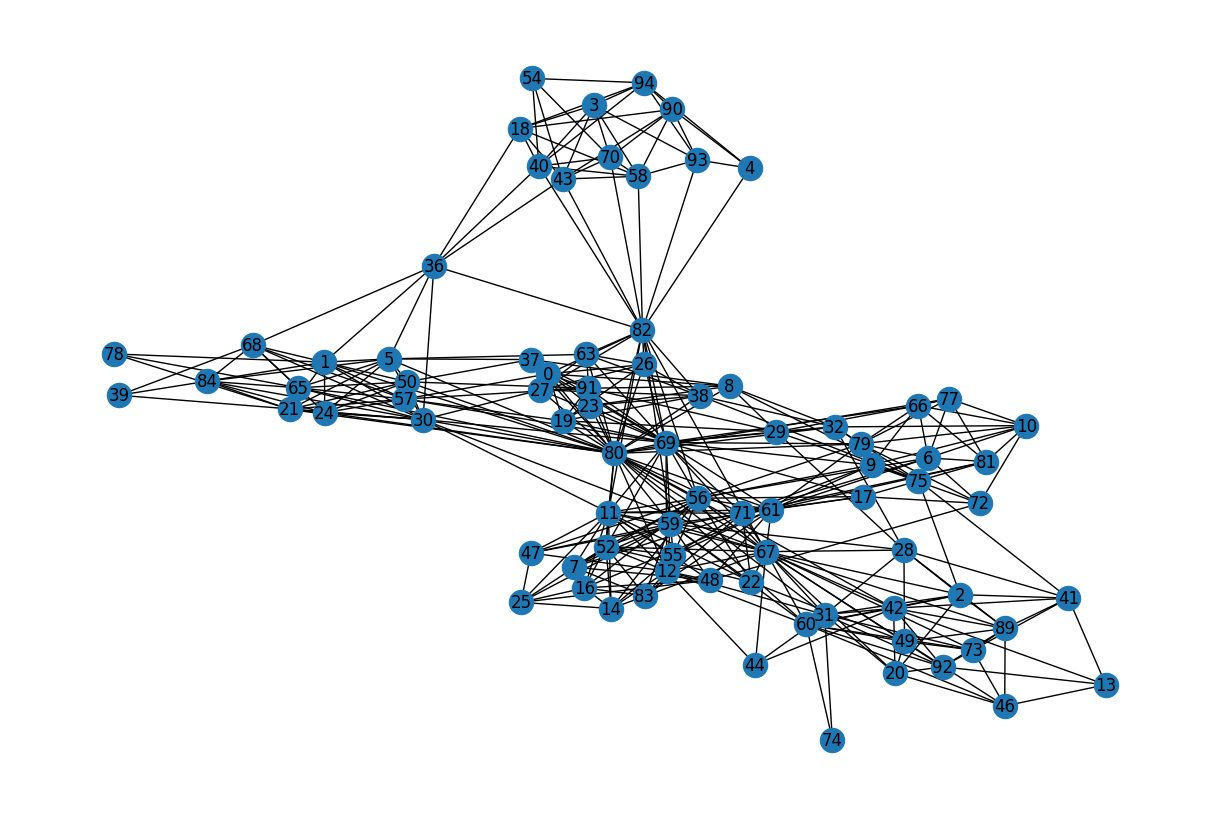

In [ ]:
plt.figure(figsize=(12, 8))   # Plot the combined graph after prediction
nx.draw(G_pred_train, with_labels = True)

# Plotting ROC AUC curve

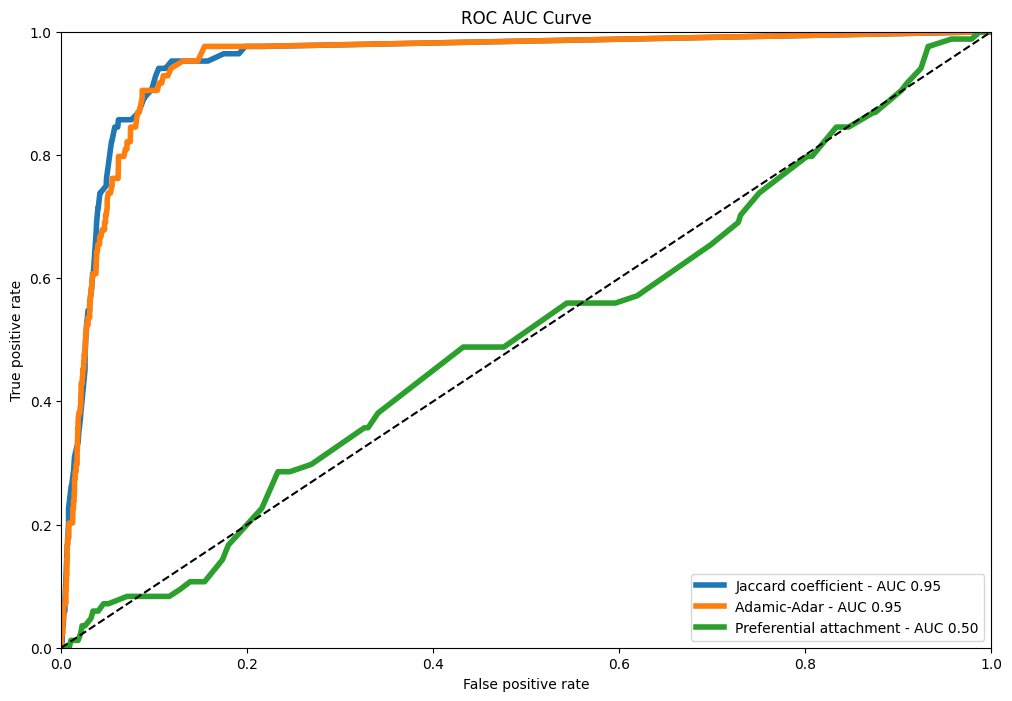

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

# Second approach - top k approach

This approach takes top k values for the similarity measures per node pair, and predicts that those top k node pairs will be connected.

k = 5% of all links in subset

In [ ]:
def sortByScore(tuple): # sorts tuple by third element in descending order.
    return( sorted( tuple, key = lambda x: x[2], reverse = True ) )

prediction_jaccard_5 = sortByScore(prediction_jaccard)

# now, take k = 5% of all links in subset.
k = int(0.05 * len(prediction_jaccard))

# first, converting list of tuples to list of lists, to be able to change scores to 1.
def convertToListOfLists(l):
    l = [list(ele) for ele in l]
    return l

prediction_jaccard_5 = convertToListOfLists(prediction_jaccard_5)

def changePredictionListByK(prediction, k):
    for i in range(0, k):
        prediction[i][2] = 1
    return prediction

prediction_jaccard_5 = changePredictionListByK(prediction_jaccard_5, k)
score_jaccard_5, label_jaccard_5 = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard_5])

fpr_jaccard_5, tpr_jaccard_5, _ = roc_curve(label_jaccard_5, score_jaccard_5)
auc_jaccard_5 = roc_auc_score(label_jaccard_5, score_jaccard_5)


#### This code sorts the Jaccard coefficient prediction tuples by their third element (score) in descending order, selects the top 5% of those tuples, sets their scores to 1, and evaluates link prediction using the resulting scores and labels obtained from the ground truth edge subset. The fpr, tpr, and auc values are also calculated for the binary classifier.

# k = 25%

In [ ]:
# repeat process for k = 25%

k = int(0.25 * len(prediction_jaccard))
prediction_jaccard_25 = sortByScore(prediction_jaccard)
prediction_jaccard_25 = convertToListOfLists(prediction_jaccard_25)
prediction_jaccard_25 = changePredictionListByK(prediction_jaccard_25, k)
score_jaccard_25, label_jaccard_25 = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard_25])

fpr_jaccard_25, tpr_jaccard_25, _ = roc_curve(label_jaccard_25, score_jaccard_25)
auc_jaccard_25 = roc_auc_score(label_jaccard_25, score_jaccard_25)

#### Selects the top 25% of those tuples, sets their scores to 1, and evaluates link prediction using the resulting scores and labels obtained from the ground truth edge subset. The fpr, tpr, and auc values are also calculated for the binary classifier.

# k = 75%

In [ ]:
# repeat process for k = 0.75

k = int(0.75 * len(prediction_jaccard))
prediction_jaccard_75 = sortByScore(prediction_jaccard)
prediction_jaccard_75 = convertToListOfLists(prediction_jaccard_75)
prediction_jaccard_75 = changePredictionListByK(prediction_jaccard_75, k)
score_jaccard_75, label_jaccard_75 = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard_75])

fpr_jaccard_75, tpr_jaccard_75, _ = roc_curve(label_jaccard_75, score_jaccard_75)
auc_jaccard_75 = roc_auc_score(label_jaccard_75, score_jaccard_75)

#### Selects the top 75% of those tuples, sets their scores to 1, and evaluates link prediction using the resulting scores and labels obtained from the ground truth edge subset. The fpr, tpr, and auc values are also calculated for the binary classifier.

# Plot ROC AUC curve

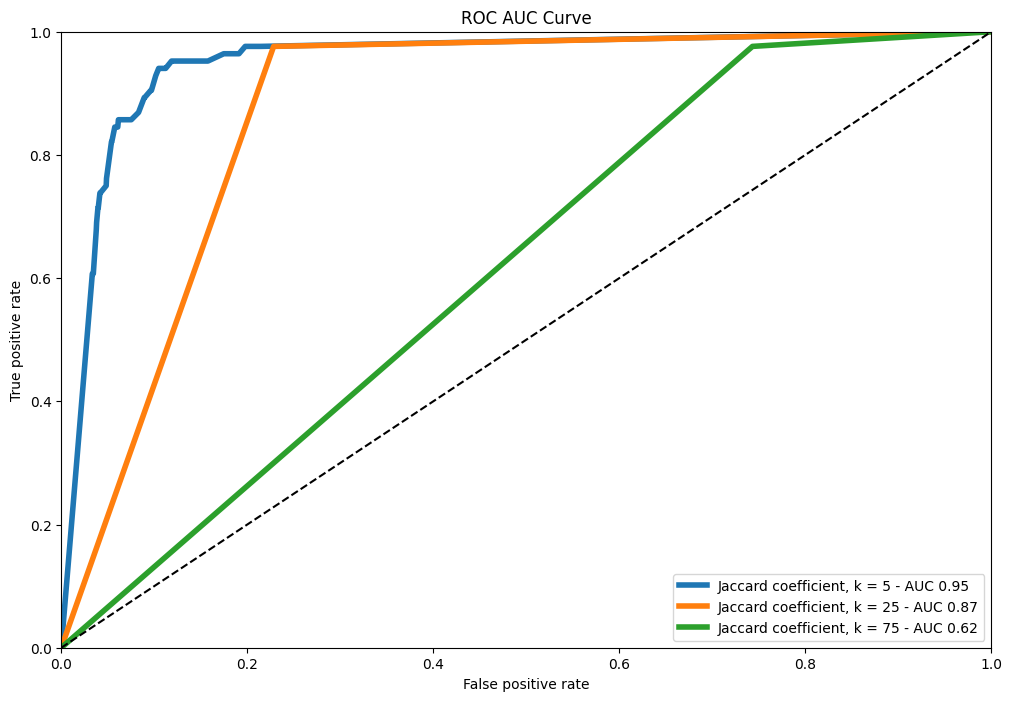

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard_5, tpr_jaccard_5, label='Jaccard coefficient, k = 5 - AUC %.2f' % auc_jaccard_5, linewidth=4)
plt.plot(fpr_jaccard_25, tpr_jaccard_25, label='Jaccard coefficient, k = 25 - AUC %.2f' % auc_jaccard_25, linewidth=4)
plt.plot(fpr_jaccard_75, tpr_jaccard_75, label='Jaccard coefficient, k = 75 - AUC %.2f' % auc_jaccard_75, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

The analysis from the ROC AUC curve may vary in certain cases.

From this particular ROC AUC curve, it can be seen that the jaccard coefficient at k = top 5% and k = top 25% perform better than k = top 75%. The optimal value for the threshold can be calculated in the same way as done in the previous approach. The values for k can be varied as well, to find at what k does the top-k approach work best.

In any case, it might be likely that this traditional approach be outperformed by more advanced approaches to link prediction.